In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

### Import Data

In [2]:
df = pd.read_csv("stock_data.csv",parse_dates=True,index_col="Date")
df.head()

Unnamed: 0   Open   High    Low  Close    Volume  Name
Date                                                              
2006-01-03         NaN  39.69  41.22  38.79  40.91  24232729  AABA
2006-01-04         NaN  41.22  41.90  40.77  40.97  20553479  AABA
2006-01-05         NaN  40.93  41.73  40.85  41.53  12829610  AABA
2006-01-06         NaN  42.88  43.57  42.80  43.21  29422828  AABA
2006-01-09         NaN  43.10  43.66  42.82  43.42  16268338  AABA

In [3]:
df.shape

(3019, 7)

### Droping unwanted columns

In [4]:
df.drop(columns='Unnamed: 0',inplace=True)

In [5]:
df.head()

Open   High    Low  Close    Volume  Name
Date                                                  
2006-01-03  39.69  41.22  38.79  40.91  24232729  AABA
2006-01-04  41.22  41.90  40.77  40.97  20553479  AABA
2006-01-05  40.93  41.73  40.85  41.53  12829610  AABA
2006-01-06  42.88  43.57  42.80  43.21  29422828  AABA
2006-01-09  43.10  43.66  42.82  43.42  16268338  AABA

### Let's do some EDA to explore more about the data

### Let's try to understand the trend in price of share over the time

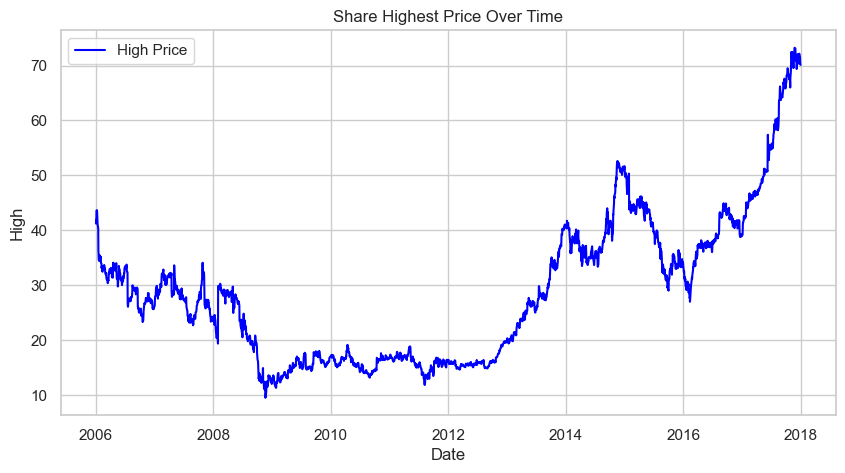

In [6]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='blue')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')

plt.show()

### As we can observe that over the time the price of the share is increasing.

### To better understand the trend of the data we will use the resampling method, resampling the data on a monthly basis can provide a clearer view of trends and patterns, especially when we are dealing with daily data.

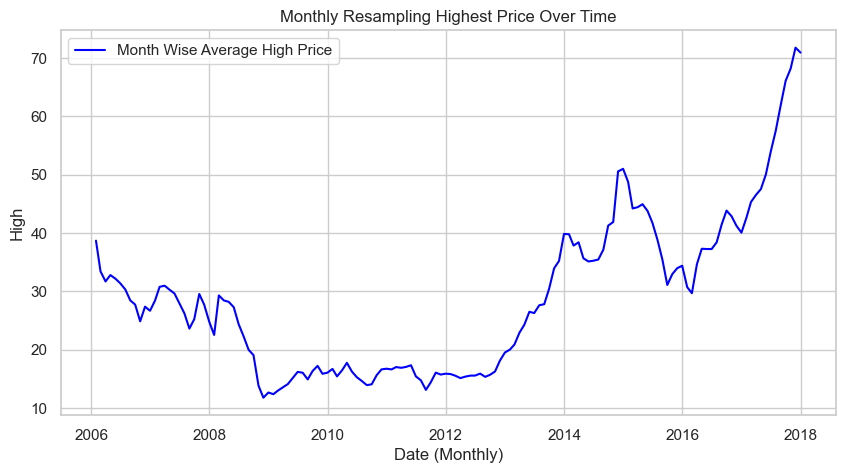

In [7]:
numeric_df = df.select_dtypes(include='number')
df_resampled = numeric_df.resample('M').mean()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5)) 
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')

plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')

plt.show()

### We have observed an upward trend in the resampled monthly volume data. An upward trend indicates that, over the monthly intervals, the price of share tends to increase.

### We will detect Seasonality using the autocorrelation function (ACF) plot. Peaks at regular intervals in the ACF plot suggest the presence of seasonality.

<Figure size 1200x500 with 0 Axes>

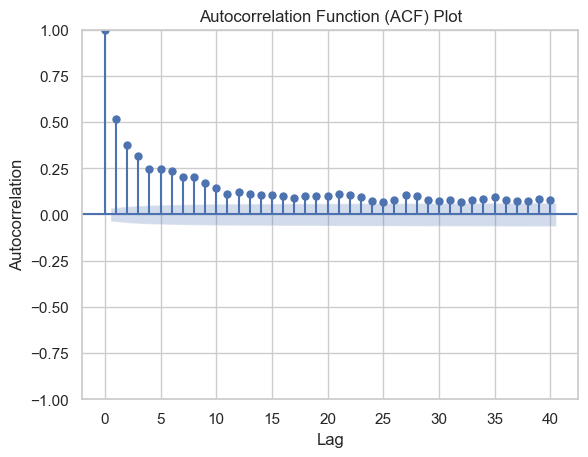

In [8]:
plt.figure(figsize=(12, 5))
plot_acf(df['Volume'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

### The presence of seasonality is typically indicated by peaks or spikes at regular intervals, as there are none there is no seasonality in our data.

### Detecting Stationarity
We will perform the ADF test to formally test for stationarity.

The test is based on the;<br>

    Null hypothesis is that a unit root is present in the time series, indicating that the series is non-stationary.
    The alternative hypothesis is that the series is stationary after differencing (i.e., it has no unit root).
The ADF test employs an augmented regression model that includes lagged differences of the series to determine the presence of a unit root.

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['High'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 0.7671404880535944
p-value: 0.9910868050318213
Critical Values: {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}


### Based on the ADF test, ADF Statistic is > all Critical Values, So, we accept the null hypothesis and conclude that the data does not appear to be stationary according to the Augmented Dickey-Fuller test.<br> This suggests that differencing or other transformations may be needed to achieve stationarity before applying certain time series models

### Smoothening the data using Differencing. <br> Differencing involves subtracting the previous observation from the current observation to remove trends or seasonality.

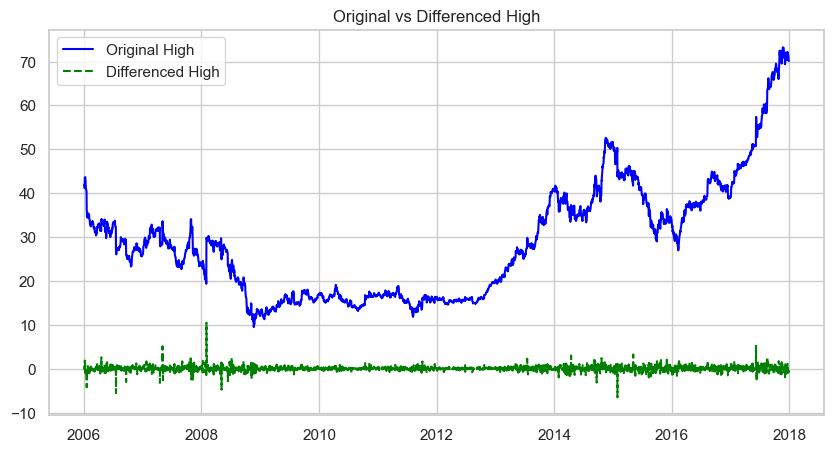

In [10]:
# Differencing
df['high_diff'] = df['High'].diff()

plt.figure(figsize=(10, 5))
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

### The df['High'].diff() part calculates the difference between consecutive values in the ‘High’ column.<br> This differencing operation is commonly used to transform a time series into a new series that represents the changes between consecutive observations.

### Now we will use the ADF test to check if our data becomes stationary after applying the differencing technique.

In [11]:
# Create a DataFrame with 'high' and 'high_diff' columns side by side
df_combined = pd.concat([df['High'], df['high_diff']], axis=1)
 
# Display the combined DataFrame
print(df_combined.head())

             High  high_diff
Date                        
2006-01-03  41.22        NaN
2006-01-04  41.90       0.68
2006-01-05  41.73      -0.17
2006-01-06  43.57       1.84
2006-01-09  43.66       0.09


### Hence, the ‘high_diff’ column represents the differences between consecutive high values .The first value of ‘high_diff’ is NaN because there is no previous value to calculate the difference.<br> As, there is a NaN value we will drop that proceed with our test,

In [12]:
# Remove rows with missing values
df.dropna(subset=['high_diff'], inplace=True)
df['high_diff'].head()

Date
2006-01-04    0.68
2006-01-05   -0.17
2006-01-06    1.84
2006-01-09    0.09
2006-01-10   -0.32
Name: high_diff, dtype: float64

In [13]:
from statsmodels.tsa.stattools import adfuller

# Assuming df is your DataFrame
result = adfuller(df['high_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -12.148367478343252
p-value: 1.5912766134148354e-22
Critical Values: {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}


### Based on the ADF Statistici.e < all Critical Values, So, we reject the null hypothesis and conclude that we have enough evidence to reject the null hypothesis. The data appear to be stationary according to the Augmented Dickey-Fuller test.<br>This suggests that differencing or other transformations may be needed to achieve stationarity before applying certain time series models.

### Smoothening the data using Moving Average.<br> Moving Average involves calculating the average of a set of consecutive data points, referred to as a “window” or “rolling window,” as it moves through the time series

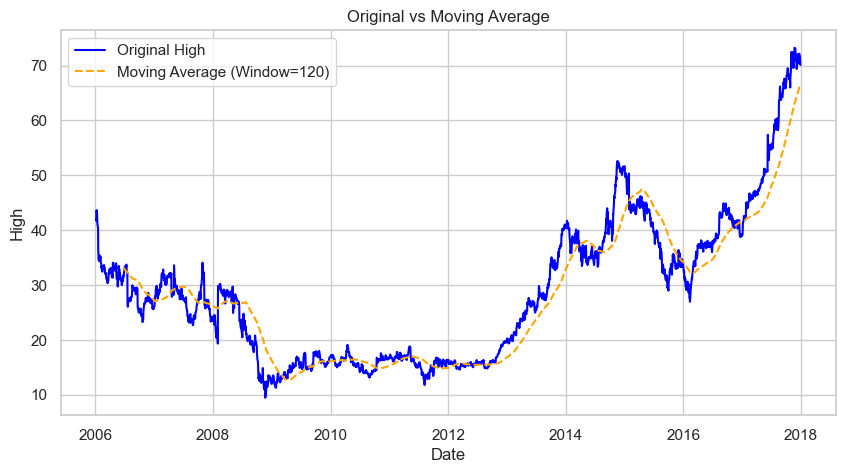

In [14]:
# Moving Average
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()


plt.figure(figsize=(10, 5))

plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()


### This calculates the moving average of the ‘High’ column with a window size of 120(A quarter) , creating a smoother curve in the ‘high_smoothed’ series. The plot compares the original ‘High’ values with the smoothed version.